In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [3]:
with open("small-text-sample.txt", "r") as file:
    sentence = file.read()

print(sentence)

Once upon a time in a quiet village nestled among rolling hills and whispering forests, there lived a young girl named Elara. Elara was known for her boundless curiosity and her love for the stars. Every night, she would climb to the highest hill near her home to gaze at the glittering sky, dreaming of distant worlds and galaxies.

In the heart of the village, there was an ancient library, tended by an old, wise librarian named Mr. Bramwell. This library was a treasure trove of books on every subject, but most importantly, it housed a collection of old star maps and celestial guides. Elara, fascinated by these books, spent countless hours with Mr. Bramwell, learning about constellations, planets, and the mysteries of the universe.

One evening, while studying an old star map, Elara noticed a small, uncharted star that twinkled differently. She shared this discovery with Mr. Bramwell, who was equally intrigued. They decided to observe this star every night, noting its unique patterns an

In [4]:
def tokenizer(sentence):
    vocabulary = sentence.split()
    vocabulary.append("<EOS>")
    
    return vocabulary

In [5]:
def vocabulary_one_hot_encoder(tokens):
    results = []

    for i, _ in enumerate(tokens):
        one_hot_encode_vector = [0. for i in range(len(tokens))]
        
        for j in range(i + 1):
            one_hot_encode_vector[j] = 1. if j == i else 0.

        results.append(one_hot_encode_vector)
                    
    return results

In [6]:
def create_cbow_pairs(sequence, window_size):
    print(f"sequence: {sequence}")
    print(f"window_size: {window_size}")
    cbow_pairs = []

    for i in range(len(sequence)):
        print(f"i: {i}")
        context = []

        for j in range(-window_size, window_size + 1):
            if i + j >= 0 and i + j < len(sequence) and j != 0:
                context.append(sequence[i + j])
        
        # print(f"context: {context}")

        if context:
            context = np.sum(context, axis=0) / len(context)
            cbow_pairs.append(context)
            # print(f"cbow_pairs: {cbow_pairs}")
            
    return cbow_pairs

In [7]:
def word_decoder(anwser_list, vocabulary):
    idx = anwser_list.index(max(anwser_list))        
    return vocabulary[idx]

In [8]:
tokens = tokenizer(sentence)
print(tokens)
print(len(tokens))

['Once', 'upon', 'a', 'time', 'in', 'a', 'quiet', 'village', 'nestled', 'among', 'rolling', 'hills', 'and', 'whispering', 'forests,', 'there', 'lived', 'a', 'young', 'girl', 'named', 'Elara.', 'Elara', 'was', 'known', 'for', 'her', 'boundless', 'curiosity', 'and', 'her', 'love', 'for', 'the', 'stars.', 'Every', 'night,', 'she', 'would', 'climb', 'to', 'the', 'highest', 'hill', 'near', 'her', 'home', 'to', 'gaze', 'at', 'the', 'glittering', 'sky,', 'dreaming', 'of', 'distant', 'worlds', 'and', 'galaxies.', 'In', 'the', 'heart', 'of', 'the', 'village,', 'there', 'was', 'an', 'ancient', 'library,', 'tended', 'by', 'an', 'old,', 'wise', 'librarian', 'named', 'Mr.', 'Bramwell.', 'This', 'library', 'was', 'a', 'treasure', 'trove', 'of', 'books', 'on', 'every', 'subject,', 'but', 'most', 'importantly,', 'it', 'housed', 'a', 'collection', 'of', 'old', 'star', 'maps', 'and', 'celestial', 'guides.', 'Elara,', 'fascinated', 'by', 'these', 'books,', 'spent', 'countless', 'hours', 'with', 'Mr.', 'B

In [9]:
training_x = vocabulary_one_hot_encoder(tokens)
print(training_x)
print(len(training_x))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [10]:
CONTEXT_SIZE = 2

training_y = create_cbow_pairs(training_x, CONTEXT_SIZE)
print(training_y)

sequence: [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [11]:
class CBOWModeler(nn.Module):
    def __init__(self, volcabulary_size, embedding_dim):
        super(CBOWModeler, self).__init__()
        self.linear1 = nn.Linear(volcabulary_size, embedding_dim, bias=False)
        self.linear2 = nn.Linear(embedding_dim, volcabulary_size, bias=False)

    def forward(self, x):
        out = self.linear1(x)
        out = self.linear2(out)
        return F.softmax(out, dim=-1)
    
    def save_embedding_model(self):
        params = self.linear1.state_dict()
        print(params["weight"])
        print(params["weight"].shape)
        torch.save(params, "./embedding_model.pt")

In [12]:
EMBEDDING_DIM = 20

losses = []
model = CBOWModeler(len(tokens), EMBEDDING_DIM).to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

print(model)

CBOWModeler(
  (linear1): Linear(in_features=324, out_features=20, bias=False)
  (linear2): Linear(in_features=20, out_features=324, bias=False)
)


/Users/kobkrit/miniconda3/envs/LLMs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
print(training_x[0])
print(len(training_x[0]))
print(training_y[0])
print(len(training_y[0]))



[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [14]:
for epoch in range(1000):
    total_loss = 0
    
    for x, y in zip(training_x, training_y):
        x, y = torch.tensor(x).to(device), torch.tensor(y).to(device)

        model.zero_grad()

        y_hat = model(x)

        loss = loss_function(y, y_hat)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    losses.append(total_loss)

model.save_embedding_model()

tensor([[ 1.1195,  0.9856,  0.1831,  ..., -0.9178, -0.5101, -1.1095],
        [ 2.6312,  3.5869,  1.5604,  ..., -0.9414,  3.4868,  0.4948],
        [-1.5975, -3.3551, -4.4612,  ...,  0.9864,  0.6467,  1.0117],
        ...,
        [ 0.3605,  3.4327,  3.3880,  ..., -0.9540, -1.1222, -0.8940],
        [-0.5999, -4.4100, -1.1699,  ..., -1.2728, -1.4094, -1.5648],
        [-0.2967,  3.7129,  1.5910,  ..., -1.0849,  1.6281, -0.9366]])
torch.Size([20, 324])


In [15]:
import matplotlib.pyplot as plt

In [16]:
def plot_losses(ax, t, losses):
    ax.plot(t, losses)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")

In [17]:
len(losses)

1000

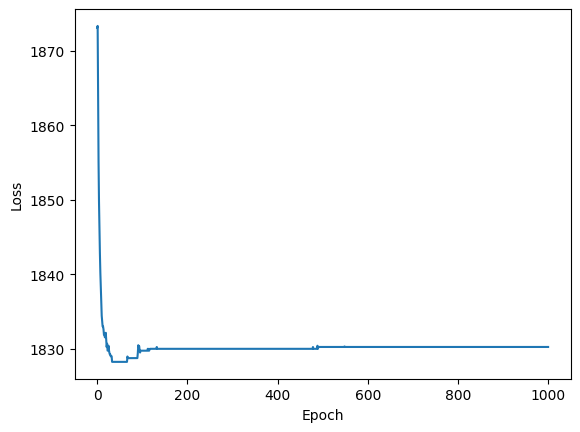

In [18]:
fig, ax = plt.subplots()
plot_losses(ax, np.linspace(0., 1000., len(losses)), losses)

In [19]:
for x, y in zip(training_x, training_y):
    # Get predicted vector
    pred = model(torch.tensor(x).to(device))

    # Get the argmax index
    argmax_idx = torch.argmax(pred, keepdim=True)

    # Create a one-hot encoded tensor
    anwser_vector = F.one_hot(argmax_idx, num_classes=pred.size(-1)).int()
    anwser_list = anwser_vector.tolist()

    print(x)
    print(anwser_list[0])
    
    question = word_decoder(x, tokens)
    answer = word_decoder(anwser_list[0], tokens)
    print(question, answer)

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,